### CARACTERIZAÇÃO UV-VIS E ELETROQUÍMICA PARA A ELETRÓLISE 

In [1]:
# IMPORTAÇÕES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [2]:
# DF da amostra C3 caracterizada no UV-Vis

df_c3 = pd.read_csv(
    'UV-Vis\Grupo8_C3.txt',
    header=41,
    sep=',',
    engine='python',
    encoding = "ISO-8859-1",
)

df_c3.head()

,Wavelength (nm),Absorbance
0,200.0,3.701
1,201.0,3.506
2,202.0,3.428
3,203.0,3.421
4,204.0,3.840


In [3]:
# DF da referência utilizada no UV-Vis

df_ref = pd.read_csv(
    'UV-Vis\Referência.txt',
    header=41,
    sep=',',
    engine='python',
    encoding = "ISO-8859-1",
)

df_ref.head()

,Wavelength (nm),Absorbance
0,200.0,3.395
1,201.0,3.363
2,202.0,4.126
3,203.0,3.946
4,204.0,4.008


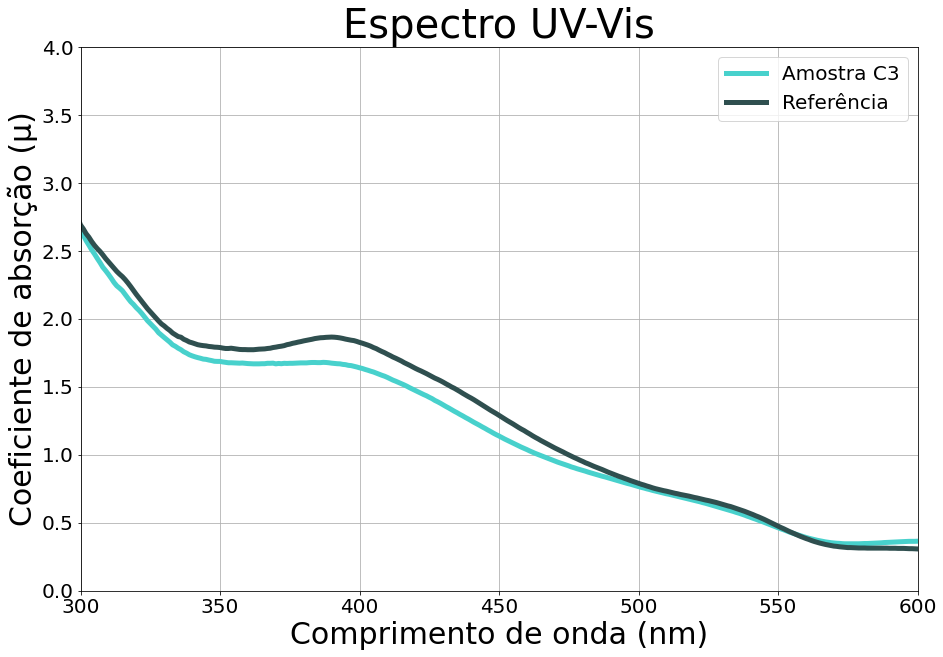

In [32]:
# Espectro da caracterização UV-Vis

plt.figure(figsize = (15, 10))
plt.plot(df_c3.iloc[:, 0], df_c3.iloc[:, 1], label = 'Amostra C3', linewidth=5, color='mediumturquoise')
plt.plot(df_ref.iloc[:, 0], df_ref.iloc[:, 1], label = 'Referência', linewidth=5, color='darkslategray')
plt.rcParams['legend.fontsize'] = 20
plt.xlabel('Comprimento de onda (nm)', size=30)
plt.ylabel('Coeficiente de absorção (μ)', size=30)
plt.title('Espectro UV-Vis', size=40)
plt.tick_params(labelsize=20)
plt.xlim(300,600)
plt.ylim(0,4)
plt.grid()
plt.legend()
plt.savefig('UV-Vis')
plt.show()

In [5]:
# DF do Linear Sweep Voltammetry Dark

df_lsvd = pd.read_csv(
    'Eletroquimica\LSV\G8_LSV_Dark.txt',
    header=0,
    sep='\t',
    engine='python',
    encoding = "ISO-8859-1",
)

df_lsvd.head()

,ï»¿Potential applied (V),WE(1).Current (A)
0,-0.697632,-0.000020
1,-0.695190,-0.000019
2,-0.692749,-0.000018
3,-0.690308,-0.000018
4,-0.687866,-0.000017


In [6]:
# DF do Linear Sweep Voltammetry Light

df_lsvl = pd.read_csv(
    'Eletroquimica\LSV\G8_LSV_Light.txt',
    header=0,
    sep='\t',
    engine='python',
    encoding = "ISO-8859-1",
)

df_lsvl.head()

,ï»¿Potential applied (V),WE(1).Current (A)
0,-0.697632,-0.000026
1,-0.695190,-0.000024
2,-0.692749,-0.000023
3,-0.690308,-0.000022
4,-0.687866,-0.000022


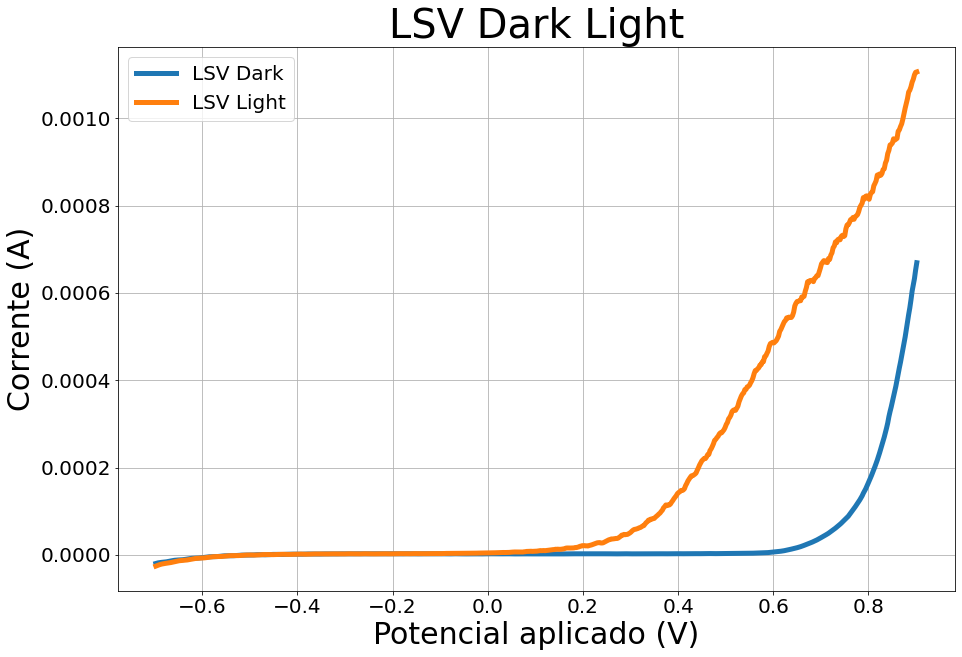

In [7]:
# Espectro do LSV

plt.figure(figsize = (15, 10))
#plt.plot(df_eis.iloc[:, 0], df_eis.iloc[:, 1], label = 'EIS', linewidth=5)
plt.plot(df_lsvd.iloc[:, 0], df_lsvd.iloc[:, 1], label = 'LSV Dark', linewidth=5)
plt.plot(df_lsvl.iloc[:, 0], df_lsvl.iloc[:, 1], label = 'LSV Light', linewidth=5)
plt.rcParams['legend.fontsize'] = 20
plt.xlabel('Potencial aplicado (V)', size=30)
plt.ylabel('Corrente (A)', size=30)
plt.title('LSV Dark Light', size=40)
plt.tick_params(labelsize=20)
plt.grid()
plt.legend()
plt.savefig('UV-Vis')
plt.show()

### Equações

Fotocorrente

$J_{ph}$ em 1.23 V vs RHE

Fotocorrente de absorção
$$J_{abs} = -q \emptyset (\eta_{cat} \eta_{cs} \eta{LH})$$

Para $\eta_{cat}$ e $\eta_{cs}$ = 1

$$J_{abs} = -q \emptyset (\eta_{LH})$$

Light harvesting efficiency
$$\eta_{LH} = 1-10^{-\int{Abs d \lambda}}$$

In [8]:
df_c3.loc[df_c3['Wavelength (nm)']==400.0]  # localizando o índice em 400nm
df_c3.loc[df_c3['Wavelength (nm)']==550.0]  # localizando o índice em 550nm

,Wavelength (nm),Absorbance
350,550.0,0.464


In [19]:
# Integral entre 400nm e 550nm

area = np.trapz(df_c3.iloc[200:351,1], df_c3.iloc[200:351,0])
int_abs = area/150

# Lista para conversão de potencial e corrente
potencial_V_L = list(df_lsvl.iloc[:, 0])
potencial_conv_L = []

corrente_A_L = list(df_lsvl.iloc[:, 1])
corrente_conv_L = []

# Conversão do potencial em V para RHE - Light

for i in range(len(potencial_V_L)):
    RHE = 0.197+potencial_V_L[i]+(0.059*(13.6))
    potencial_conv_L.append(RHE)
    
# Conversão da corrente em A/cm² para mA/cm² - Light

for i in range(len(corrente_A_L)):
    corrente_mA = corrente_A_L[i]*1000/0.785375
    corrente_conv_L.append(corrente_mA)
    
# Lista para conversão de potencial e corrente
potencial_V_D = list(df_lsvd.iloc[:, 0])
potencial_conv_D = []

corrente_A_D = list(df_lsvd.iloc[:, 1])
corrente_conv_D = []

# Conversão do potencial em V para RHE

for i in range(len(potencial_V_D)):
    RHE = 0.197+potencial_V_D[i]+(0.059*(13.6))
    potencial_conv_D.append(RHE)
    
# Conversão da corrente em A/cm² para mA/cm²

for i in range(len(corrente_A_D)):
    corrente_mA = corrente_A_D[i]*1000/0.785375
    corrente_conv_D.append(corrente_mA)

In [20]:
# Interpolação para obter a corrente no potencial de 1.23V (Jph)

potencial = 1.23
f = interp1d(potencial_conv, corrente_conv)
corrente = f(potencial)
print('A corrente no potencial 1.23V vs RHE é', corrente, 'mA/cm²')

A corrente no potencial 1.23V vs RHE é 0.03548748824954243 mA/cm²


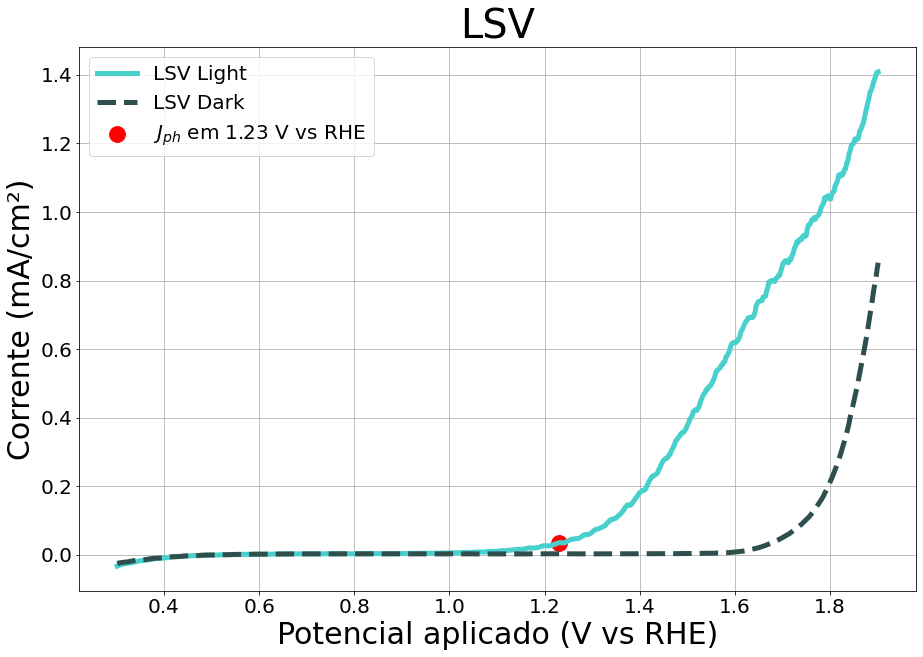

In [31]:
# Espectro do LSV convertido
    
plt.figure(figsize = (15, 10))
plt.plot(potencial_conv_L, corrente_conv_L, label = 'LSV Light', linewidth=5, color='mediumturquoise')
plt.plot(potencial_conv_D, corrente_conv_D, label = 'LSV Dark', linewidth=5, linestyle='--', color='darkslategray')
plt.scatter(potencial, corrente, label = '$J_{ph}$ em 1.23 V vs RHE', color='red', s=250, marker='o')
plt.rcParams['legend.fontsize'] = 20
plt.xlabel('Potencial aplicado (V vs RHE)', size=30)
plt.ylabel('Corrente (mA/cm²)', size=30)
plt.title('LSV', size=40)
plt.tick_params(labelsize=20)
plt.grid()
plt.legend()
plt.savefig('LSV')
plt.show()

In [12]:
# Área de integração entre 400 e 550 nm
area = np.trapz(df_c3.iloc[200:351,1], df_c3.iloc[200:351,0])

q = -1.602176634*10**(-10) # carga elementar em C
o = 8.197*10**(16) # fluxo de fóton em cm-²s-¹nm-¹
n_cat = 1 # catalytic efficiency
n_cs = 1 # charge separation

q_o = q*o
print(q_o/10**9)

# Light harvesting efficiency
n_lh = 1-10**(-int_abs)
print('O nLH é', n_lh)

# Fotocorrente
J_ph = corrente
print('O Jph é', J_ph)

# Fotocorrente de absorção
J_abs = abs(q*o*(n_lh)/10**6) # Conversão para mA/cm²
print('O Jabs é', J_abs, 'mA/cm²')

# Resistência

n_overall = J_ph/J_abs*100
print('O noverall é', round(n_overall,2), '%')

-0.013133041868897999
O nLH é 0.8978174664181385
O Jph é 0.03548748824954243
O Jabs é 11.791074377097337 mA/cm²
O noverall é 0.3 %


In [13]:
# DF do EIS - Electrochemical Impedance Spectroscopy

df_eis = pd.read_csv(
    'Eletroquimica\EIS\G8.txt',
    header=4,
    sep=',',
    engine='python',
    encoding = "ISO-8859-1",
)

df_eis.head()

,999.987125396729,0,0.1,0.2,58.3552552634637,-14.7658077804412,0.3,0.4,0.5
0,794.321299,0,0,0,58.954761,-18.257650,0,0,0
1,630.959868,0,0,0,59.792848,-22.555395,0,0,0
2,501.185656,0,0,0,60.914791,-27.834202,0,0,0
3,398.106873,0,0,0,62.425129,-34.226709,0,0,0
4,316.224992,0,0,0,64.471623,-41.965726,0,0,0


In [14]:
# Conversão da corrente para +

corrente_EIS = list(df_eis.iloc[:, 5])
corrente_EIS_conv = []

for i in range(len(corrente_EIS)):
    corrente = corrente_EIS[i]*(-1)
    corrente_EIS_conv.append(corrente)

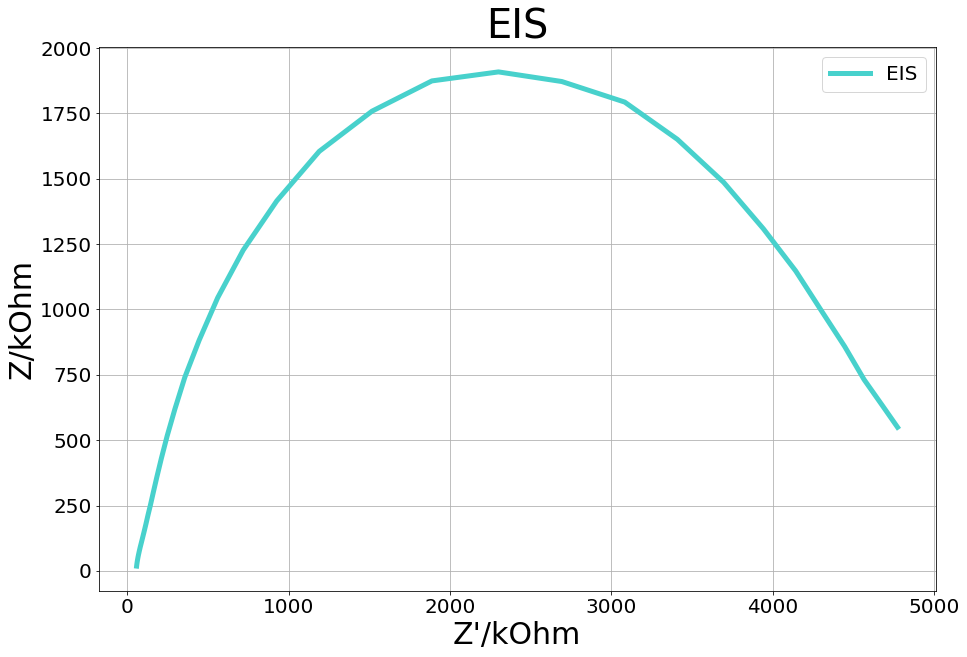

In [33]:
# Espectro do EIS

plt.figure(figsize = (15, 10))
plt.plot(df_eis.iloc[:, 4], corrente_EIS_conv, label = 'EIS', linewidth=5, color='mediumturquoise')
plt.rcParams['legend.fontsize'] = 20
plt.xlabel("Z'/kOhm", size=30)
plt.ylabel('Z''/kOhm', size=30)
plt.title('EIS', size=40)
plt.tick_params(labelsize=20)
plt.grid()
plt.legend()
plt.savefig('EIS')
plt.show()